In [99]:
# carregar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn import preprocessing
import statsmodels.api as sm
#from elm import ELMRegressor
from simpleELM import ELMRegressor


In [100]:
path = 'C:/Users/Micro/Desktop/PAIRS_TRADING/DATA/PREBASE/'
dfbovespa = pd.read_csv(path+"COTACOES_consolidado.csv", sep = ';',encoding="ISO-8859-1")

In [101]:
#Seleção do par de ativos para análise de correlação e cointegração
acao1 = 'MYPK3'
acao2 = 'CIEL3'
df_acao1 = dfbovespa[dfbovespa["cod_papel"] == acao1]
df_acao2 = dfbovespa[dfbovespa["cod_papel"] == acao2]


In [102]:
df_comp = pd.DataFrame()
df_comp['data_pregao'] =  pd.to_datetime(df_acao1['data_pregao'].values)
df_comp[acao1] =  df_acao1['preco_ultimo'].values
df_comp[acao2] =  df_acao2['preco_ultimo'].values
df_comp.set_index('data_pregao', inplace=True)
df_comp.head()

,MYPK3,CIEL3
data_pregao,,
2010-01-04,25.75,15.80
2010-01-05,26.21,15.69
2010-01-06,27.65,15.65
2010-01-07,28.37,16.02
2010-01-08,28.65,15.82


In [103]:
spread = df_comp[acao1] - df_comp[acao2]
df_comp['Spread'] =  spread
df_comp.head()

,MYPK3,CIEL3,Spread
data_pregao,,,
2010-01-04,25.75,15.80,9.95
2010-01-05,26.21,15.69,10.52
2010-01-06,27.65,15.65,12.00
2010-01-07,28.37,16.02,12.35
2010-01-08,28.65,15.82,12.83


In [104]:
from sklearn.model_selection import train_test_split
y= df_comp.Spread
x= df_comp.drop('Spread',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [108]:
elm = ELMRegressor(n_hidden_units=100)

elm.fit(x_train, y_train)
prediction = elm.predict(x_test)
prediction

array([-2.14255371e+01, -2.61230469e-01,  1.41286621e+01, -3.11361084e+01,
       -2.39038086e+01, -4.50366211e+00, -1.53740234e+01,  7.87084961e+00,
       -3.17503662e+01, -1.37248535e+01, -1.72358398e+01, -2.82194824e+01,
       -1.89208984e+01, -1.78171387e+01,  8.00317383e+00,  1.36635742e+01,
       -4.05502930e+01, -1.50422363e+01, -2.45290527e+01, -1.46025391e+01,
        1.26252441e+01, -4.33282471e+01, -2.07474365e+01, -2.57941895e+01,
       -2.04687500e+01, -2.93688965e+01, -2.29357910e+01, -2.28095703e+01,
        1.09948730e+01, -1.19348145e+00, -2.69479980e+01,  9.78955078e+00,
       -6.67871094e+00, -2.84794922e+01,  7.27734375e+00,  8.42651367e+00,
       -2.43027344e+01, -1.60681152e+01,  1.43045654e+01, -1.66715088e+01,
       -2.00649414e+01, -4.08427734e+01, -2.86230469e+01, -3.33581543e+01,
        8.44946289e+00, -1.12082520e+01,  7.48352051e+00, -7.52563477e+00,
       -2.65578613e+01, -3.97447510e+01,  8.40698242e+00, -2.22875977e+00,
       -7.43896484e+00,  

In [117]:
df_result = pd.DataFrame()
df_result['predicted'] = prediction
df_result['test'] = y_test.values
df_result.head(20)

,predicted,test
0,-21.425537,-21.79
1,-0.261230,0.39
2,14.128662,15.23
3,-31.136108,-31.11
4,-23.903809,-23.77
5,-4.503662,-5.25
6,-15.374023,-15.98
7,7.870850,7.84
8,-31.750366,-31.51
9,-13.724854,-14.57


In [115]:
y_test

data_pregao
2015-09-14   -21.79
2010-05-31     0.39
2019-07-18    15.23
2013-07-22   -31.11
2014-10-13   -23.77
              ...  
2015-10-30   -20.61
2015-03-19   -35.98
2019-10-31     9.88
2014-10-02   -22.05
2016-09-02   -14.11
Name: Spread, Length: 495, dtype: float64

<AxesSubplot:>

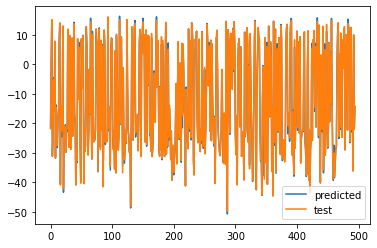

In [116]:
import matplotlib.pyplot as plt
df_result.plot()